# OFacT - Beispielhafter Workflow
Modellparameter bestimmen, simulieren und analysieren ...

## Parametrierbares Modell mit Parametern

### 🏭 Modell
Das Modell beschreibt das reale Produktions- oder Logistiksystem.

### Parameter: 📥 Auftragspool (System Last)
Die Aufträge bilden die Last für das System ab. Dies kann bspw. der Order Pool eines Tages sein.

###  Parameter: 📅 Schichtplan (Kapazitäten)
Der Schedule ist der Schichtplan des System. Es beschreibt welche Ressourcen (Mitarbeiter, Arbeitsstationen, etc.) wann verfügbar sind.

## 🏭 Simulieren
Für die Simulation wird das parametrierbare Modell eingeladen und nachfolgend simuliert (Simulationslauf).
Welcher Zeitraum simuliert wird oder ob die simuliert den vollstänfigen Auftragspool durchsimuliert ist bspw. ein weiterer Parameter.

## 📊 Analysieren
Basierend auf den simulierten Prozessausführungen, wird im nachfolgenden der Simulationslauf ausgewertet.
Die Auswertung lassen sich unterschiedliche Kennzahlen heranziehen ...
- Liefertreue
- Ressourcenauslastung
- Durchlaufzeit
- ...

Basierend auf den Ergebnissen, lassen sich die Modellparameter manuell oder automatisiert editieren.
Zielsetzung ist die Verbesserung der Ergebnisse, nach vorher definierten Zielgrößen.
Beispielhaft soll die Ressourcenauslastung und die Liefertreue optimiert werden. Beiede sollen möglichst 100% erreichen ...

# Modell

In [3]:
from projects.data_detectives.code.functions import *
from pathlib import Path

No module named 'pyarrow'
Project Path: C:\Users\afreiter\PycharmProjects\ofact\projects/bicycle_world


In [2]:
state_model_file_name = "bicycle_factory"
file_types = ["xlsx",
              "pkl"]
file_type = file_types[0]
state_model = create_state_model(state_model_file_name, file_type=file_type)

[2025-07-03 12:26:41.254143] Start deserialization from excel file C:\Users\afreiter\PycharmProjects\ofact\projects\bicycle_world\scenarios\current\models\twin\bicycle_factory.xlsx
[2025-07-03 12:27:11.072653] Static state model deserialization from excel file C:\Users\afreiter\PycharmProjects\ofact\projects\bicycle_world\scenarios\current\models\twin\bicycle_factory.xlsx finished.
2025-07-03 12:27:52.510091 State Model Serialization finished.


In [3]:
orders = state_model.get_orders()
for order in orders:
    print(f"Der Kundenname des Auftrags ist: '{order.customer.name}'.")

Der Kundenname des Auftrags ist: 'Ellena Dapolito'.
Der Kundenname des Auftrags ist: 'Lindy Justin'.
Der Kundenname des Auftrags ist: 'Ellena Dapolito'.
Der Kundenname des Auftrags ist: 'Francoise Schissler'.
Der Kundenname des Auftrags ist: 'Francoise Schissler'.
Der Kundenname des Auftrags ist: 'Francoise Schissler'.
Der Kundenname des Auftrags ist: 'Autumn Boll'.
Der Kundenname des Auftrags ist: 'Lindy Justin'.
Der Kundenname des Auftrags ist: 'Ellena Dapolito'.
Der Kundenname des Auftrags ist: 'Ellena Dapolito'.
Der Kundenname des Auftrags ist: 'Lindy Justin'.
Der Kundenname des Auftrags ist: 'Ellena Dapolito'.
Der Kundenname des Auftrags ist: 'Emmie Dobyns'.
Der Kundenname des Auftrags ist: 'Francoise Schissler'.
Der Kundenname des Auftrags ist: 'Emmie Dobyns'.
Der Kundenname des Auftrags ist: 'Autumn Boll'.
Der Kundenname des Auftrags ist: 'Francoise Schissler'.
Der Kundenname des Auftrags ist: 'Lindy Justin'.
Der Kundenname des Auftrags ist: 'Emmie Dobyns'.
Der Kundenname des Au

In [4]:
order = orders[0]

print("Der erste Auftrag hat die folgenden Merkmale:")
for i, feature in enumerate(order.features_requested):
    print(f"Merkmal {i}: '{feature.name}'")

Der erste Auftrag hat die folgenden Merkmale:
Merkmal 0: 'male city bike'
Merkmal 1: 'suspension trekking standard'
Merkmal 2: 'blue metallic'
Merkmal 3: 'handlebar comfort with sport ring'
Merkmal 4: 'rims terrain pro'
Merkmal 5: 'wheel sport'
Merkmal 6: 'gear shift racing bike'
Merkmal 7: 'saddle junior'
Merkmal 8: 'disc brakes standard'
Merkmal 9: 'lightning pro'
Merkmal 10: 'pedale trekking'
Merkmal 11: 'customer delivery'


# Parameter

In [7]:
schedule_name = "schedule_s1"
get_table(f"/scenarios/current/models/resource/{schedule_name}.xlsx", target_file=None, sheet_name="General")

# Simulation

In [1]:
# Beachte: Bevor die Simulation gestartet werden kann, sollte der Kommunikationsserver "pyjabber" gestartet werden ...
!python -m projects.bicycle_world.scenarios.current.main

No module named 'pyarrow'
Project Path: C:\Users\afreiter\PycharmProjects\ofact\projects/bicycle_world
Configuration file not found.
STATUS: Starting Execution
Platform name: Windows
2025-07-03 12:33:25.556173 Execute Simulation
Digital Twin updated
Environment Initialized
correction_needed available
agents from excel
Agents model created
Agents Model Initialized
2025-07-03 12:33:27.525012 Register Agents
Individualize Agents
Time limit: (datetime.datetime(2025, 7, 4, 7, 0), datetime.datetime(2025, 7, 4, 17, 0), 19)
...[agent administration] removing all existing users from the xmpp-server (http://127.0.0.1:9090)
...[agent administration] Create Agents
[Agent Administration] Start agent main_part_agv_nsr_agentfactory_agents 

[main_part_agv_nsr_agentfactory_agents] Hello World! I'm agent main_part_agv_nsr_agentfactory_agents@127.0.0.1 
 TransportAgent 

[Agent Administration] Start agent individual_part_agv_nsr_agentfactory_agents 

[individual_part_agv_nsr_agentfactory_agents] Hello W

# Analyse

In [5]:
resource_schedule = "schedule_s1"
work_in_process = 15
scenario = f"{resource_schedule}_{work_in_process}"

state_model_file_path = Path(PROJECT_PATH + f"/scenarios/current/results/{scenario}.pkl")
state_model: StateModel = deserialize_state_model(state_model_file_path, persistence_format="pkl", dynamics=True)

Platform name: Windows


AnalyticsDataBase instantiation finished


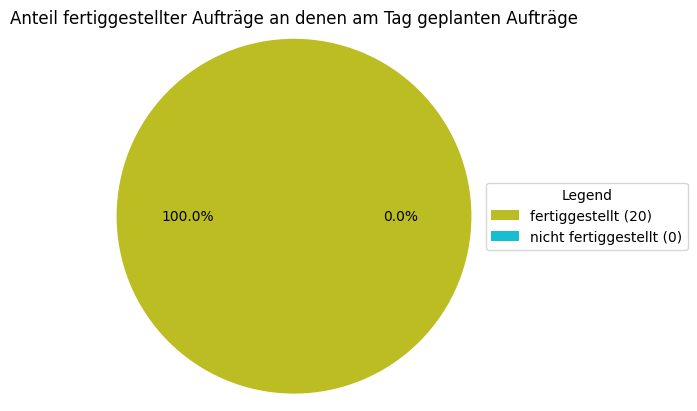

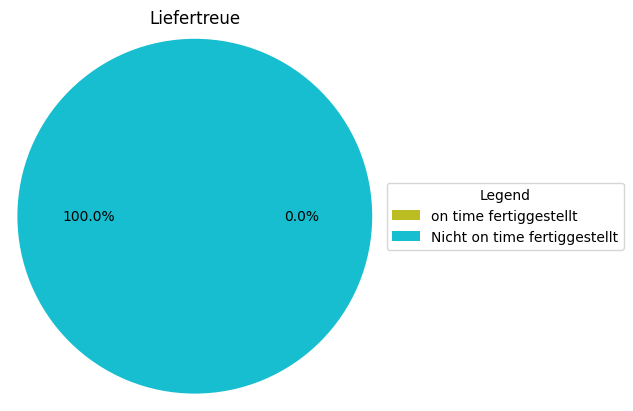

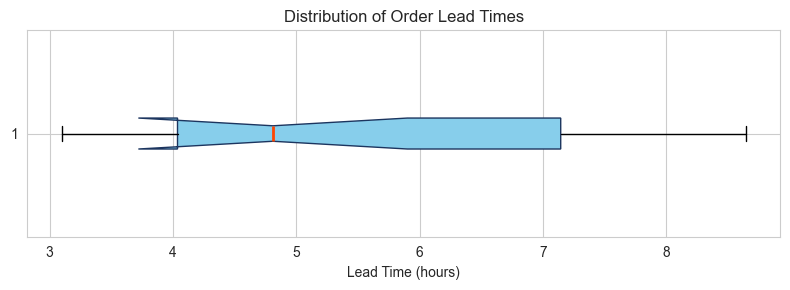

In [6]:
schedule = get_schedule(state_model)

get_order_finished(state_model)  # share of orders finished
get_delivery_reliability(state_model)  # delivery reliability
get_order_lead_time(state_model)  # order lead time
actual_resources_working_hours, planned_resources_working_hours = (
    get_schedule_time_equivalent(schedule=schedule,
                                 aggregated=["Main Part AGV"]))  # capacity utilization